<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/Canbanghistogram_anhmau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

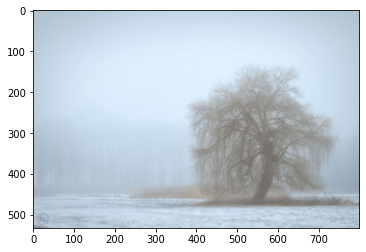

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Buoc 1: Doc anh tu file
img = cv2.imread('/content/p2219651326-5-800x533.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


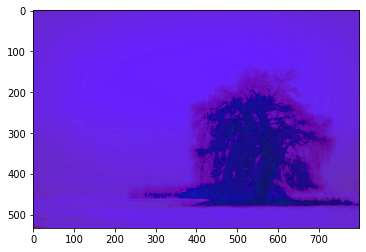

In [99]:
#Buoc 2: covert sang HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

<BarContainer object of 256 artists>

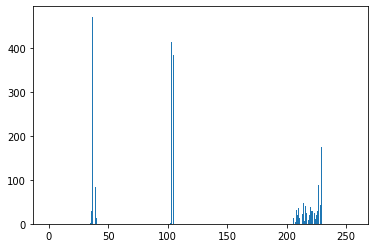

In [100]:
# Buoc 3:Can bang kênh V
img_vec = img_hsv[2].reshape(-1)
def cal_hist(img_vec):
    hist = np.zeros(256, np.int)
    values, counts = np.unique(img_vec, return_counts=True)
    for i, val in enumerate(values):
        hist[val] = counts[i]
    return hist
hist = cal_hist(img_vec)
plt.bar(range(0,256), hist)

<BarContainer object of 256 artists>

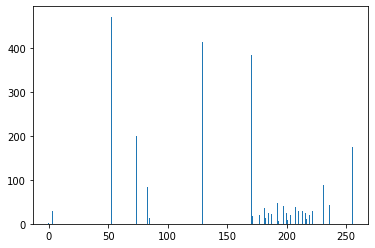

In [101]:
cdf = np.cumsum(hist)
cdf_min = np.min(cdf)
h = (cdf - cdf_min) / (cdf[-1] - cdf_min) * 255
h = h.astype(np.int)
img_eq = img_hsv[2].copy()
for v in range(256):
    img_eq[img_hsv[2]==v] = h[v]
img_vec = img_eq.reshape(-1)
hist = cal_hist(img_vec)
plt.bar(range(0,256), hist)


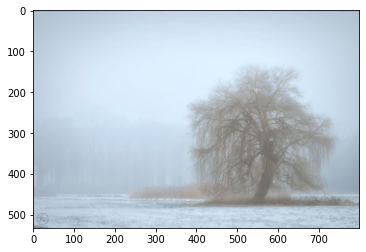

In [105]:
#Buoc 4: Rap lai kenh mau hsv
img_hsv[2]=img_eq
#Buoc 5: covert ve RGB
img_rgb_new=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)
#Buoc 6: show hang
plt.show()
plt.imshow(img_rgb_new)

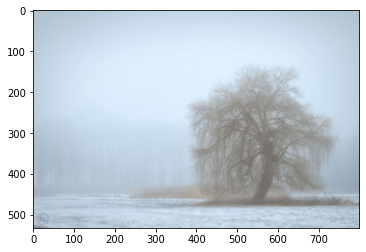

In [106]:
plt.imshow(img_rgb)